<a href="https://colab.research.google.com/github/kahram-y/first-repository/blob/master/etc/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 스마트폰 가격대 분류하기!

오늘은 분류 문제를 공부해봅시다!

스마트폰에는 정말 다양한 부품과 기능이 있습니다.
RAM의 크기, 배터리의 용량, 전/후면 카메라의 성능, 최신 핸드폰이라면 Fold 가능성 등등... 다양한 피쳐들이 스마트폰의 가격대를 설정하게 됩니다.

오늘의 미션 코드는 이러한 스마트폰의 스펙을 입력받아 가격의 범주를 예측하는 문제입니다!

이미 1일차와 2일차에 회귀 문제를 예시로 전체 파이프라인을 검토해보셨으니, 빠르게 빠르게 넘어가볼까요?

(price range : 0~3, very low = 0, low = 1, high = 2, very high = 3)

데이터셋 출처 : https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data?select=train.csv

# 데이터 확인 및 시각화

In [ ]:
import pandas as pd

df = pd.read_csv('./train.csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

데이터를 살펴보니
1. 데이터 크기는 2000개이고,
2. 결측치는 없으며,
3. 20개의 피쳐와 1개의 타겟변수(`price_range`)가 있으며
4. 두 개의 피쳐(`clock_speed`, `m_dep`)를 제외하고는 모두 정수형 `int64`임을 알 수 있네요!

참고로 각각의 피쳐들은 다음을 나타냅니다.

<div style="text-align:center;border-radius:60px 100px; padding:10px">


|       | **Attribute** | **Information** |
| :---  |     :---      |       :---      |      
| **1** | battery_power | 한 번에 저장할 수 있는 총 에너지 (mAh) |                
| **2** | blue | 블루투스 지원 여부 |                        
| **3** | clock_speed | 프로세서가 명령을 실행하는 속도 |
| **4** | dual_sim | 듀얼 SIM 기능 지원 여부 |
| **5** | fc | 전면 카메라 화소 (Megapixels) |                     
| **6** | four_g | 4G 지원 여부 |
| **7** | int_memory | 내장 메모리 크기 (GB) |              
| **8** | m_dep | 스마트폰 두께 (Cm)  |                      
| **9** | mobile_wt |  스마트폰 무게 |
| **10** | pc | 후면 카메라 희소 (Megapixels) |
| **11** | px_height | 픽셀 해상도 높이 |                      
| **12** | px_width | 픽셀 해상도 너비 |
| **13** | ram | 메모리 용량 (GB)  |              
| **14** | sc_h | 화면 높이 (Cm)  |                      
| **15** | sc_w | 화면 너비 (Cm) |
| **16** | talk_time | 한 번 충전으로 지속 가능한 최대 통화 시간 |
| **17** | three_g | 3G 지원 여부 |                      
| **18** | touch_screen | 터치 스크린 지원 여부 |
| **19** | wifi | 와이파이 지원 여부 |              
| **20** | n_cores | 프로세서 코어 개수 |                       
| **21** | **price_range** | 타겟 변수, 0: 저가, 1: 중간 가격, 2: 고가, 3: 초고가

범주형 타겟 변수인 `price_range` 데이터 분포를 bar plot을 통해 시각적으로 확인해볼까요?

<Axes: xlabel='price_range'>

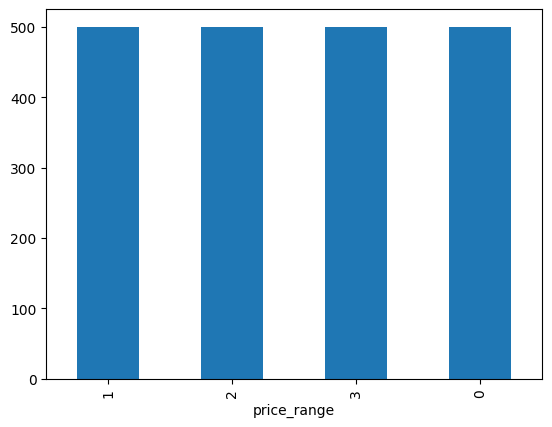

In [ ]:
df['price_range'].value_counts().plot(kind='bar')

데이터 확인 작업에서 대부분의 특성이 정수형인 것을 확인했습니다.

그 중에서, 다시 범주형 데이터가 더미 변수화 (0 = 거짓, 1 = 참) 된 자료들이 몇 가지 있었는데, (여부를 묻는 것들)

각 특성에는 몇 개의 고유 수치들이 있을 지 확인해봅시다.


In [ ]:
df.apply(lambda x: len(x.unique()))

,0
battery_power,1094
blue,2
clock_speed,26
dual_sim,2
fc,20
four_g,2
int_memory,63
m_dep,10
mobile_wt,121
n_cores,8


In [ ]:
df_categorical = df[['price_range', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype(str)
unique_counts = df_categorical.nunique()
unique_values = df_categorical.apply(lambda x: x.unique())
pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
price_range,4,"[1, 2, 3, 0]"
n_cores,8,"[2, 3, 5, 6, 1, 8, 4, 7]"
blue,2,"[0, 1]"
dual_sim,2,"[0, 1]"
four_g,2,"[0, 1]"
three_g,2,"[0, 1]"
touch_screen,2,"[0, 1]"
wifi,2,"[1, 0]"


`blue`, `dual_sim`, `four_g`, `three_g`, `touch_screen`, 그리고 `wifi` 까지 총 6개의 변수가 2가지의 unique data로 구성되어 있네요!

이런 경우에는 이상치는 독립적으로는 확인하기 어렵겠습니다.

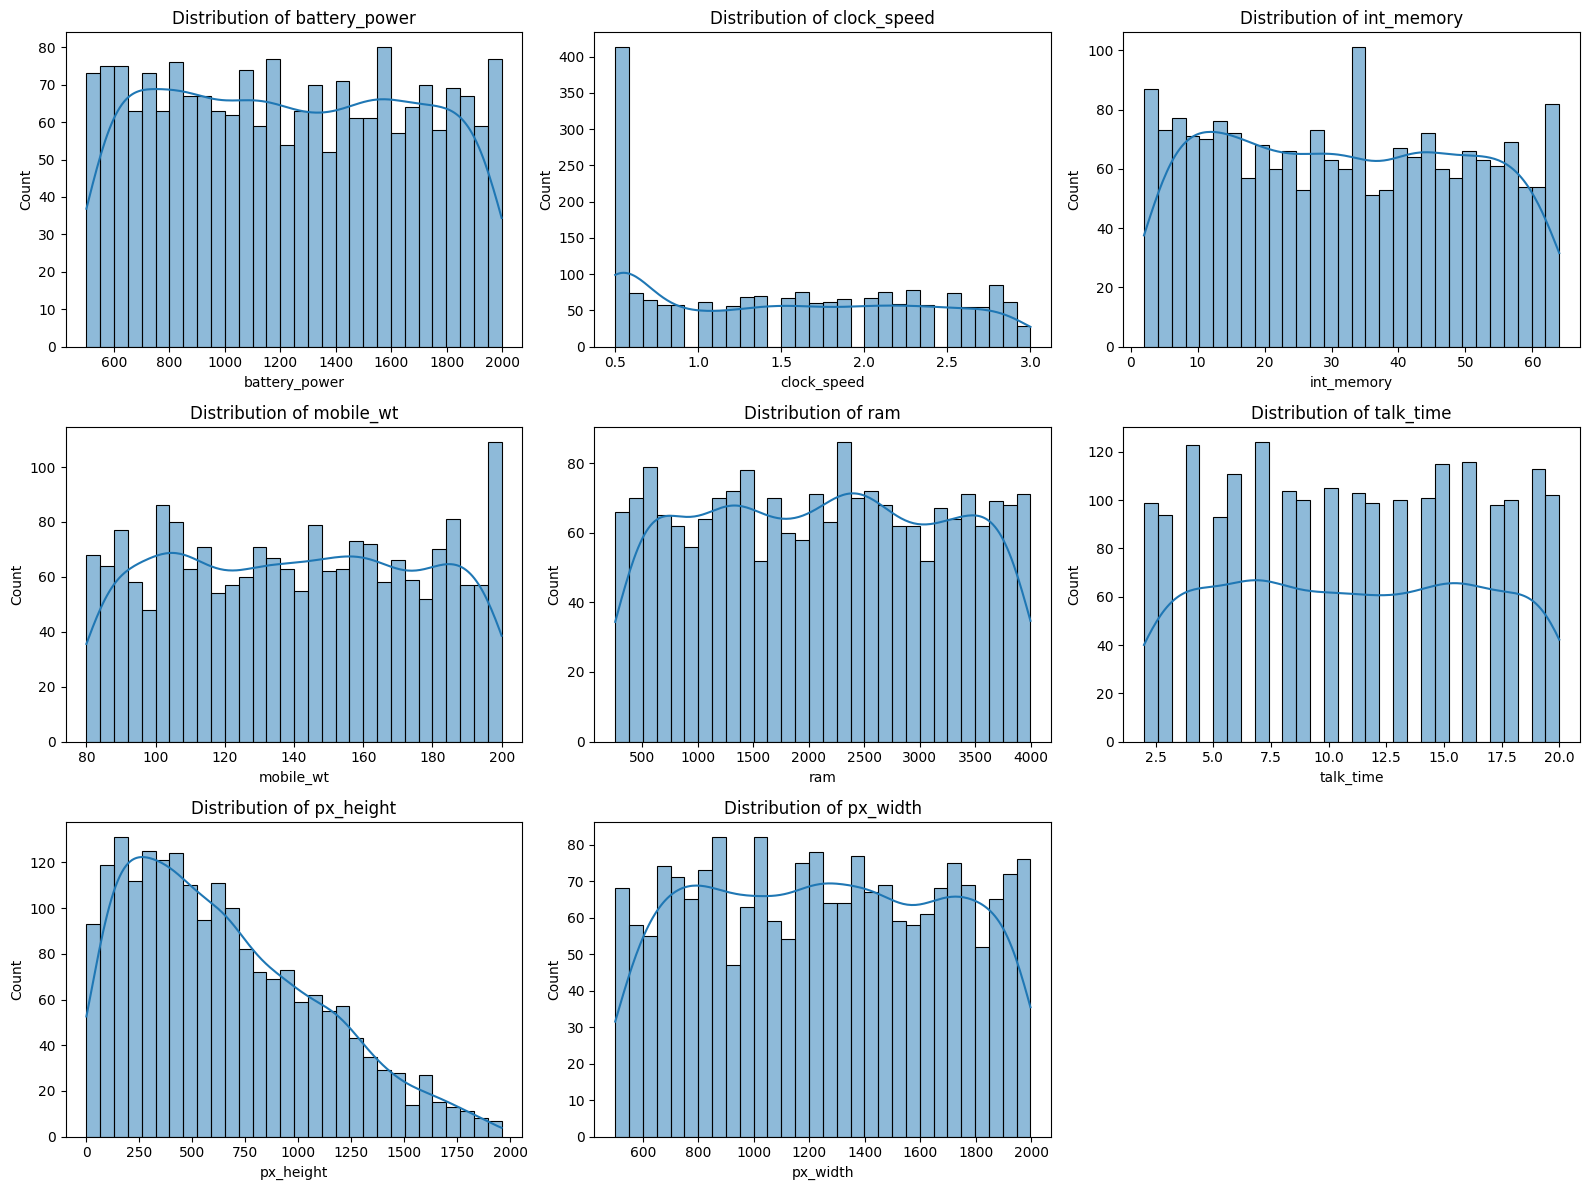

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_features = ['battery_power','clock_speed','int_memory','mobile_wt','ram','talk_time','px_height','px_width']

plt.figure(figsize=(16,12))
for i, col in enumerate(continuous_features, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

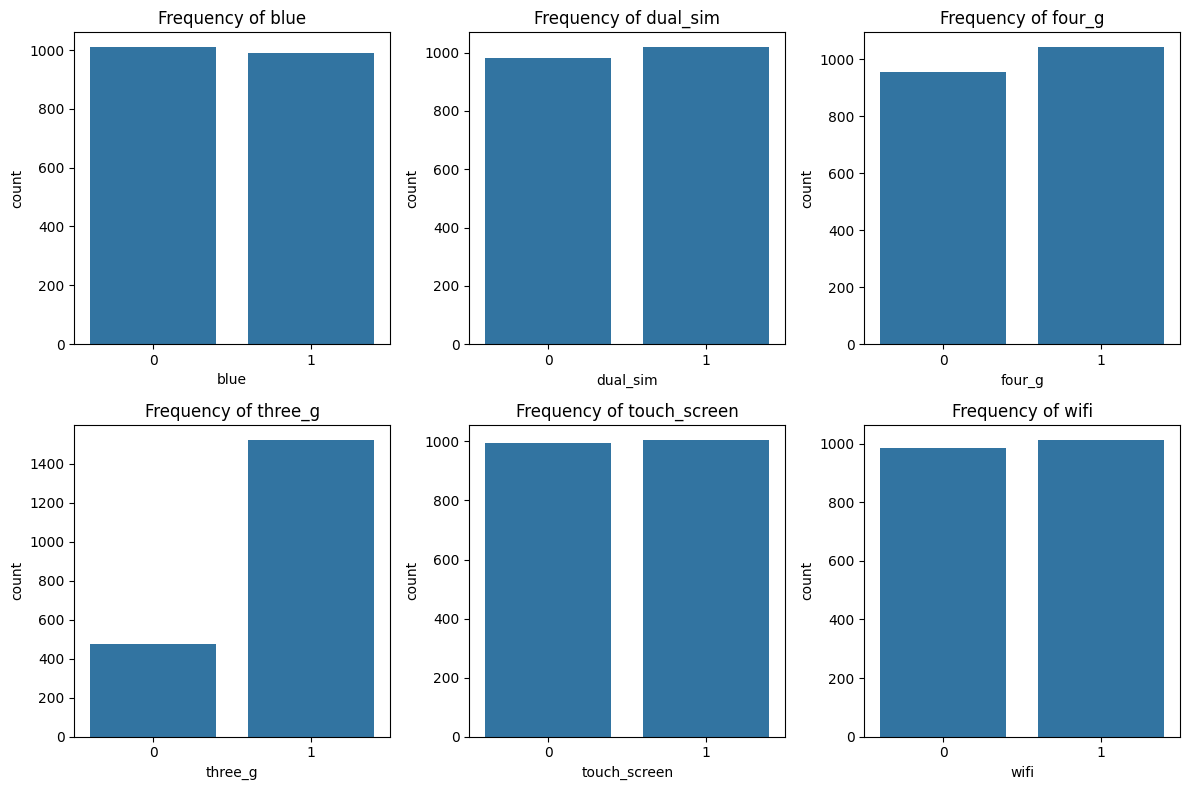

In [ ]:
binary_features = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']

plt.figure(figsize=(12,8))
for i, col in enumerate(binary_features, 1):
    plt.subplot(2,3,i)
    sns.countplot(x=df[col])
    plt.title(f'Frequency of {col}')
plt.tight_layout()
plt.show()


### 데이터 간 상관관계를 봐 볼까요?

다중공선성 이외에도, 상관관계는 타겟 변수와 겹치는 특성의 종류를 확인하고 불필요한 자료를 제거하는 데에는 항상 필수적입니다.

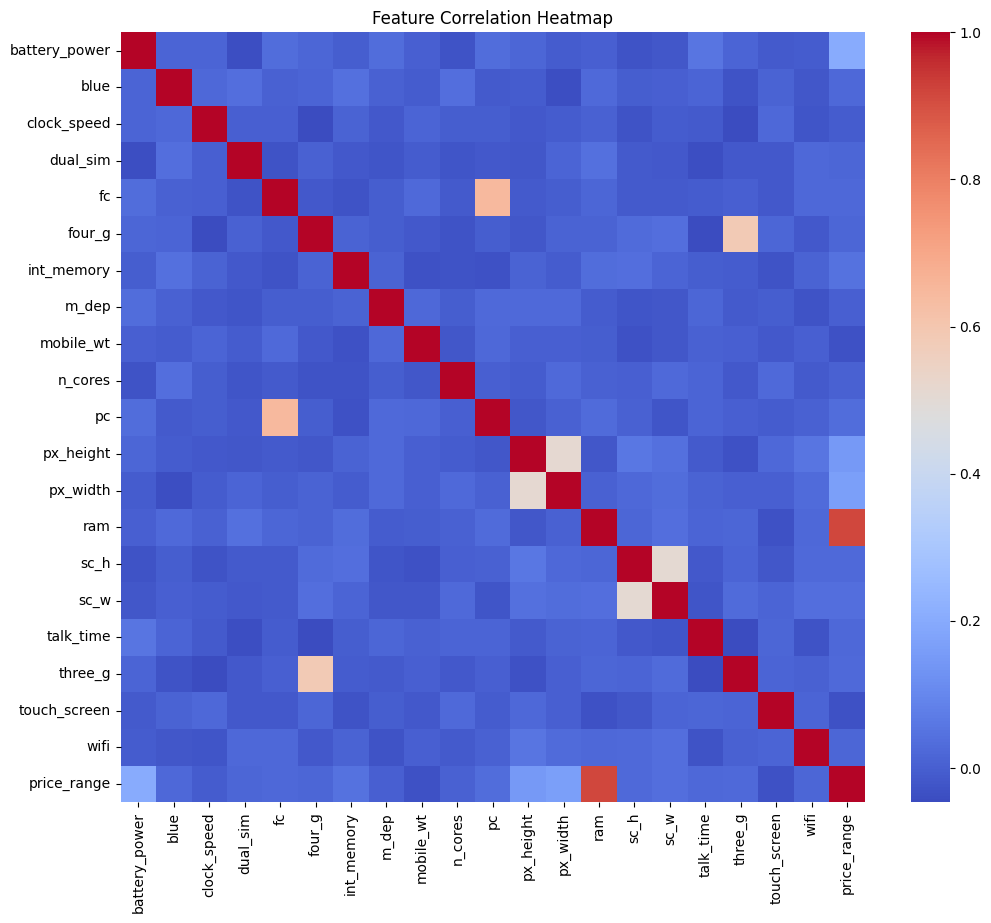

In [ ]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
df.corr()['price_range'].sort_values(ascending=False)

,price_range
price_range,1.000000
ram,0.917046
battery_power,0.200723
px_width,0.165818
px_height,0.148858
int_memory,0.044435
sc_w,0.038711
pc,0.033599
three_g,0.023611
sc_h,0.022986


보아하니 타겟 변수인 `price_range`와 독립 변수 중 `ram`, 즉 메모리 용량과는 강한 선형성이 있어보입니다!

`price_range`와 피처 간 관계 탐색 뿐 아니라, 특히 `ram`과의 관계는 violin plot까지 확인해봅시다.

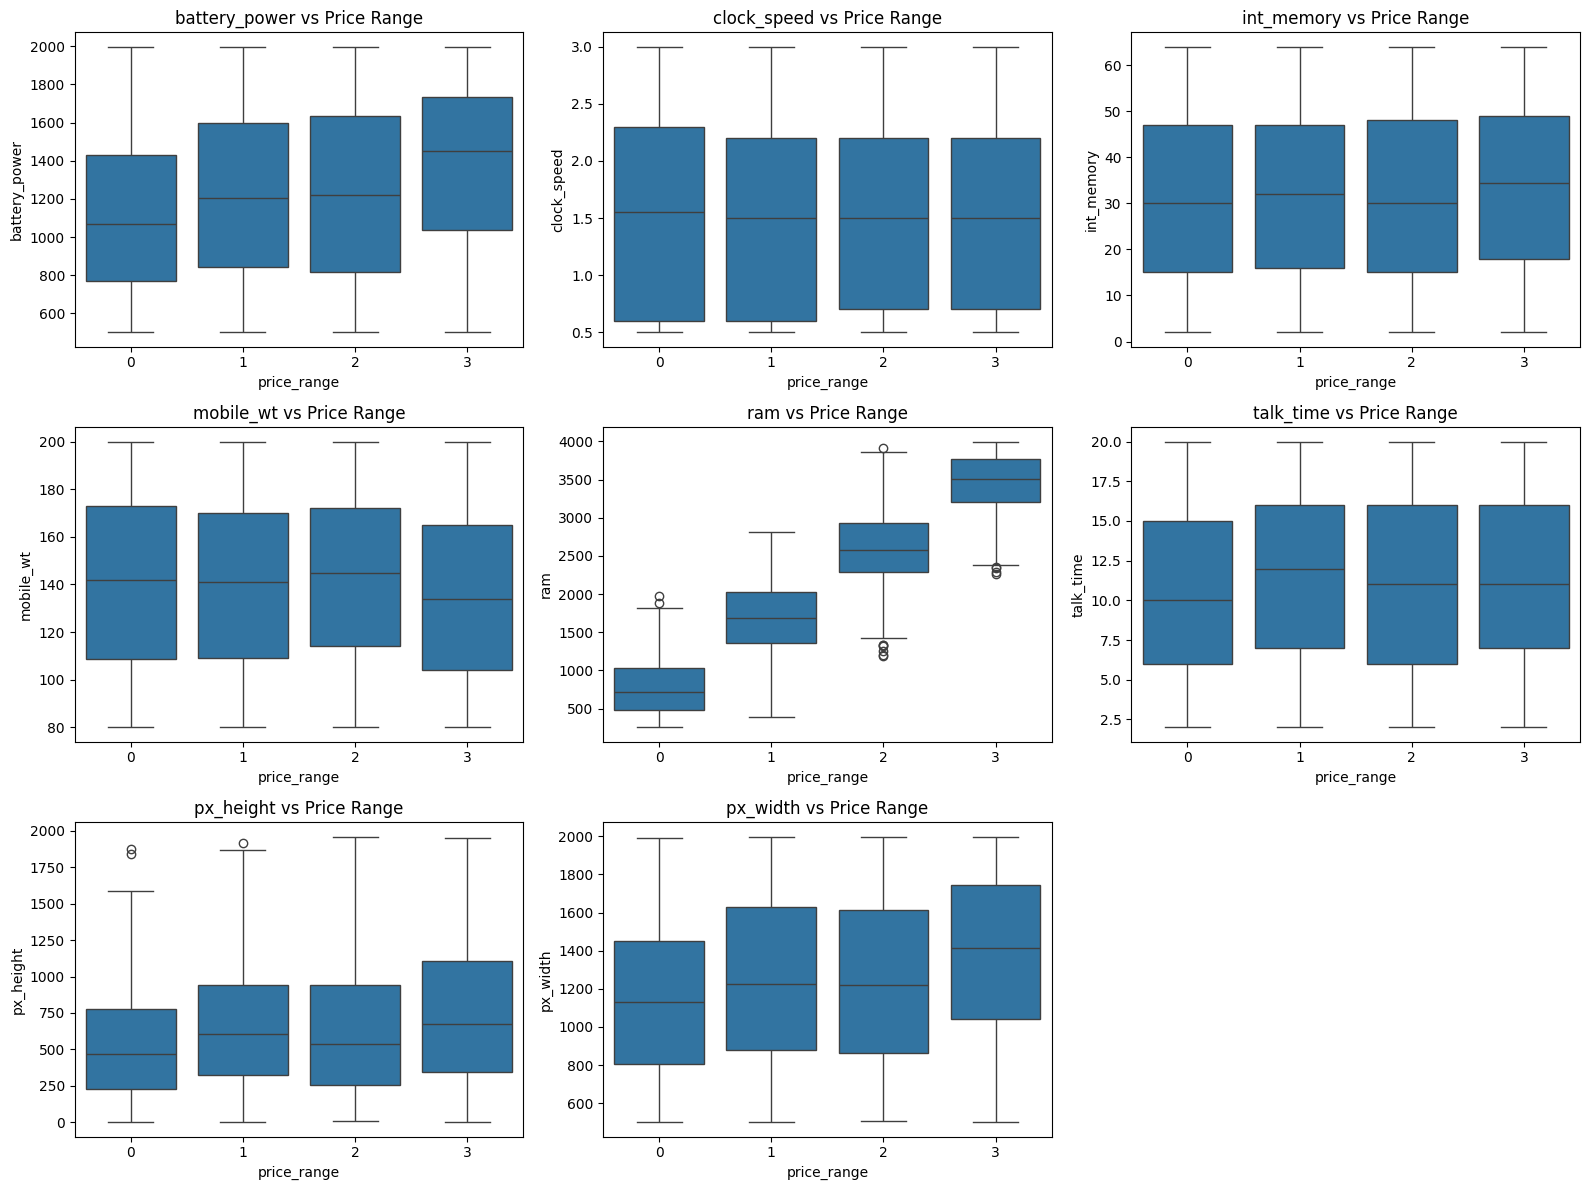

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,12))
for i, col in enumerate(continuous_features[:], 1):
    plt.subplot(3,3,i)
    sns.boxplot(x='price_range', y=col, data=df)
    plt.title(f'{col} vs Price Range')
plt.tight_layout()
plt.show()

/tmp/ipython-input-529427313.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='price_range', y='ram', data=df, palette="muted")


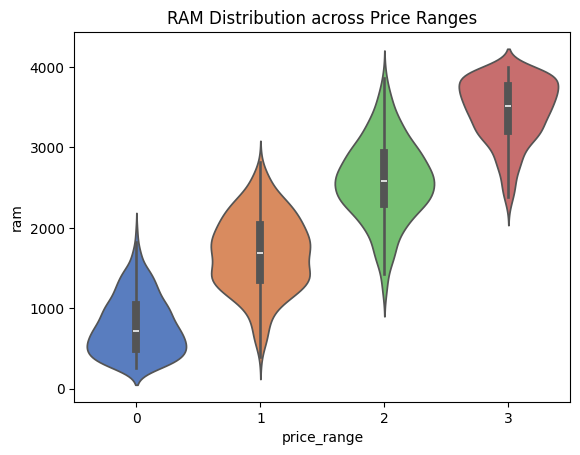

In [ ]:
sns.violinplot(x='price_range', y='ram', data=df, palette="muted")
plt.title("RAM Distribution across Price Ranges")
plt.show()

## Q1. 데이터 시각화 결과 1차로 얻을 수 있던 인사이트는 무엇인가요?

A.

1. `price_range`과 `ram`은 매우 강하게 상관관계가 있다.
2. `pc`와 `fc` 간에는 강한 상관관계가 있다.
3. `sc_h`와 `sc_w` 간에는 약한 상관관계가 있다.
4. `four_g`와 `three_g` 간에는 약한 상관관계가 있다.
5. `px_height`와 `px_width` 간에는 약한 상관관계가 있다.
6, `price_range`는 `ram`을 제외한 나머지 특성과는 약한 상관만을 갖고 있다.

# 미션 1. 추가적인 데이터 시각화 및 인사이트 얻기를 시도해보기

RAM이 타겟과 관련이 크다는 것을 확인했으니, 다음 수순은 자연스럽게 RAM과 다른 피쳐간의 상관관계 파악일 듯 합니다.

피쳐 간 상관관계 말고도, 그룹 별 분포차이, t-SNE 시각화 등 여러 가지 방법을 사용해보세요!

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 미션 2. 이상치 제거와 같은 추가적인 전처리 시도하기

위에서 확인한 이상치를 제거해봅시다.

또, fc와 pc 사이 강한 공선성이 존재했는데, fc/pc 와 같은 새 변수를 도입하는 것도 새로운 전처리 방법이 될 수 있겠어요.

피쳐 제거, PCA와 같은 엔지니어링도 자유롭게 해 주세요!

지금까지의 결과를 보면 fc, pc, px_height, px_width가 다른 피처들과 강한 상관관계를 보여 다중공선성(VIF) 값이 매우 높거나 무한(inf)으로 나타났습니다.
이에 따라 다음 전처리를 적용합니다:

- fc, pc → 제거 (대신 camera_sum 유지)

- px_height, px_width → 제거 (대신 pixel_area 유지)

- 전처리 후 다시 VIF 계산 및 비교

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 1. 데이터 불러오기 및 기본 확인
df = pd.read_csv('./train.csv')

# 파생 변수 추가
df['camera_sum'] = df['fc'] + df['pc']
df['fc_pc_ratio'] = np.where(df['pc'] == 0, 0, df['fc'] / df['pc'])
df['pixel_area'] = df['px_height'] * df['px_width']

# 이상치 제거 (예: ram 이상치 제거)
Q1 = df['ram'].quantile(0.25)
Q3 = df['ram'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['ram'] >= Q1 - 1.5 * IQR) & (df['ram'] <= Q3 + 1.5 * IQR)]


# 2. 다중공선성 제거 전 VIF 계산
X_before = df.drop('price_range', axis=1)

vif_before = pd.DataFrame()
vif_before["feature"] = X_before.columns
vif_before["VIF"] = [variance_inflation_factor(X_before.values, i)
                     for i in range(X_before.shape[1])]

print("VIF before feature elimination:\n", vif_before.sort_values(by="VIF", ascending=False))


# 3. 다중공선성 제거: fc, pc, px_height, px_width 제거
drop_features = ['fc', 'pc', 'px_height', 'px_width']
df_reduced = df.drop(columns=drop_features)


# 4. 스케일링 및 훈련/테스트 분리
X = df_reduced.drop('price_range', axis=1)
y = df_reduced['price_range']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 5. 다중공선성 제거 후 VIF 계산
vif_after = pd.DataFrame()
vif_after["feature"] = X.columns
vif_after["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print("\nVIF after feature elimination:\n", vif_after.sort_values(by="VIF", ascending=False))

🔍 해석 및 결과 기대

제거 전:

- fc, pc, camera_sum, px_height, px_width, pixel_area, ram 등의 VIF가 매우 높거나 무한대(∞).

- 이는 강한 상관관계(공선성)를 의미하며 모델 학습 시 회귀계수 불안정 → 예측력 저하로 이어짐.

제거 후:

- camera_sum, pixel_area, ram 등의 VIF는 여전히 다소 높을 수 있지만 대부분 10 이하로 안정화될 가능성 큼.

- 변수 중복성이 감소해 모델 해석력과 학습 안정성이 개선됨.

# 분류 모델을 트라이 해 봅시다!

여러 시각화를 통해서, 피쳐와 타겟 사이에는 적당한 양의 선형적 상관관계가 존재함을 보았습니다.

그렇다면 실제로 어떤 모델이 성능이 가장 좋을까요?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC()
}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    return acc


In [ ]:
import pandas as pd

results = []

for name, model in models.items():
    acc = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({"Model": name, "Accuracy": acc})

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
results_df


Accuracy: 0.9650
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.96      0.96      0.96       100
           2       0.95      0.94      0.94       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400

Confusion Matrix:
 [[98  2  0  0]
 [ 1 96  3  0]
 [ 0  2 94  4]
 [ 0  0  2 98]]
Accuracy: 0.5000
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.70      0.67       100
           1       0.33      0.38      0.35       100
           2       0.39      0.41      0.40       100
           3       0.72      0.51      0.60       100

    accuracy                           0.50       400
   macro avg       0.52      0.50      0.51       400
weighted avg       0.52

,Model,Accuracy
0,Logistic Regression,0.9650
5,SVM,0.8950
3,Random Forest,0.8825
2,Decision Tree,0.8550
4,Naive Bayes,0.8100
1,KNN,0.5000


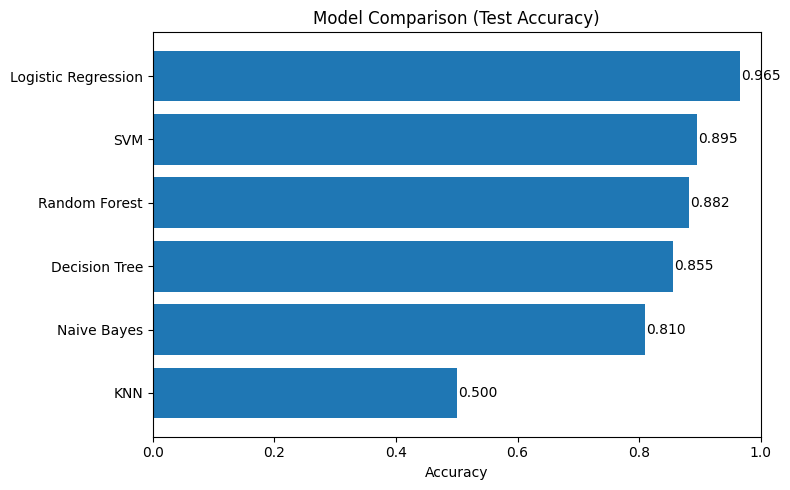

In [ ]:
import matplotlib.pyplot as plt

plot_df = results_df.sort_values("Accuracy", ascending=True)

plt.figure(figsize=(8, 5))
plt.barh(plot_df["Model"], plot_df["Accuracy"])
for i, v in enumerate(plot_df["Accuracy"]):
    plt.text(v + 0.002, i, f"{v:.3f}", va="center")
plt.xlabel("Accuracy")
plt.title("Model Comparison (Test Accuracy)")
plt.xlim(0, 1.0)
plt.tight_layout()
plt.show()


### 교차 검증

단일 홀드아웃 대신, 교차검증을 활용하여 평균적인 성능과 분산을 제시해 모델 예측 결과의 신뢰성을 제시합시다.

이는 결정트리처럼 성능 편차가 크게 존재할 수 있는 경우에 유용합니다.

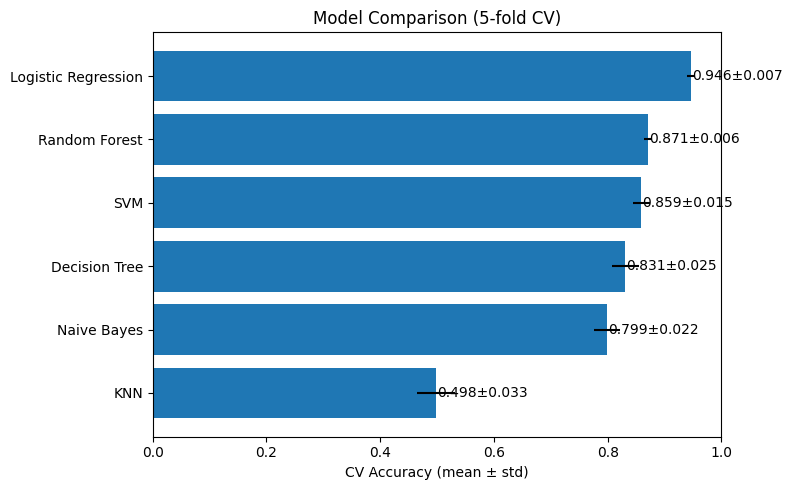

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cv_results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results.append({
        "Model": name,
        "CV_Mean": np.mean(scores),
        "CV_Std":  np.std(scores)
    })

cv_df = pd.DataFrame(cv_results).sort_values("CV_Mean", ascending=True)

plt.figure(figsize=(8, 5))
plt.barh(cv_df["Model"], cv_df["CV_Mean"], xerr=cv_df["CV_Std"])
for i, (m, mu, sd) in enumerate(zip(cv_df["Model"], cv_df["CV_Mean"], cv_df["CV_Std"])):
    plt.text(mu + 0.002, i, f"{mu:.3f}±{sd:.3f}", va="center")
plt.xlabel("CV Accuracy (mean ± std)")
plt.title("Model Comparison (5-fold CV)")
plt.xlim(0, 1.0)
plt.tight_layout()
plt.show()


서포트 벡터 머신 기반 분류기가 로지스틱 회귀를 이기지 못 했네요!

그리드 서치를 활용해서 과연 성능역전을 이뤄낼 지 지켜볼까요?

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# 최적 모델로 테스트셋 평가
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.96
Test Accuracy: 0.975


# 미션 자가진단

1. 추가적인 시각화를 시도하셨나요?
2. 추가적인 전처리를 시도하셨나요?
3. 해당 작업 하에서 어떤 모델이 성능이 제일 좋았나요?

# 추가적인 해석/신뢰성 EDA + 모델 분석 진행하기

위에서는 여태까지 진행했던 데이터 준비 / 모델 정의 / 학습 / 예측 / 평가의 파이프라인을 간단히 진행했습니다.

이 섹션에서는 보다 나은 결과 해석과 모델 설정이 가능하도록 여러 추가적인 시각화 장치를 다뤄봅시다.

### Permutation Importance

Permutation Importance(순열 중요도)란, 훈련된 머신러닝 모델이 특정 특성에 얼마나 의존하는지를 측정하는 모델 해석 기법입니다.

핵심 아이디어는 특정 특성의 데이터 열을 무작위로 섞어 해당 특성과 결과값 사이의 관계를 파괴한 후, 모델의 예측 성능이 얼마나 저하되는지를 측정하는 것입니다.

성능 저하가 클수록 해당 특성이 모델에게 중요하다고 판단합니다.

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np

# 다시 한 번 로지스틱 회귀를 예로 활용하겠습니다.
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train, y_train)

perm = permutation_importance(best_model, X_test, y_test, n_repeats=15, random_state=42, n_jobs=-1, scoring='accuracy')
pi_df = pd.DataFrame({
    "feature": list(df.drop(columns="price_range").columns),
    "mean_importance": perm.importances_mean,
    "std_importance": perm.importances_std
}).sort_values("mean_importance", ascending=False)
pi_df.head(15)


,feature,mean_importance,std_importance
13,ram,6.883333e-01,0.020180
0,battery_power,2.160000e-01,0.011358
12,px_width,1.131667e-01,0.012795
11,px_height,9.650000e-02,0.009211
8,mobile_wt,1.316667e-02,0.004871
17,three_g,6.166667e-03,0.003399
7,m_dep,5.833333e-03,0.003837
9,n_cores,3.666667e-03,0.002867
6,int_memory,3.333333e-03,0.003837
14,sc_h,1.500000e-03,0.005831


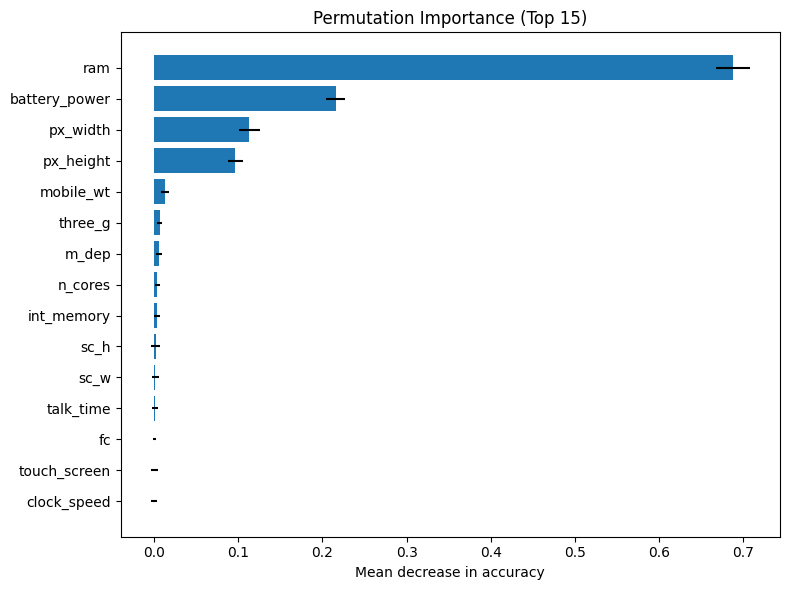

In [ ]:
import matplotlib.pyplot as plt

topk = 15
plt.figure(figsize=(8,6))
ranked = pi_df.head(topk).iloc[::-1]
plt.barh(ranked["feature"], ranked["mean_importance"], xerr=ranked["std_importance"])
plt.title("Permutation Importance (Top 15)")
plt.xlabel("Mean decrease in accuracy")
plt.tight_layout()
plt.show()


앞에서 확인했던 것 처럼, `price_range`와 상관관계 값이 가장 컸던 `ram` 피쳐가 평균적인 PI 값 감소량이 가장 컸습니다. 즉, 이 변수가 모델 예측 형성에 있어 가장 중요하게 작용했다고 결론 내릴 수 있겠네요!

한 편으로, `battery_power` 변수 또한 그 다음으로 중요한 피쳐라는 것을 확인했습니다.

이 결과를 가지고 그럼 왜 로지스틱 회귀가 가장 좋은 성능을 보였는지 볼 수 있을까요?



### 결정 경계 시각화

앞서 Permutation Importance에서 `ram`과 `battery_power`가 가장 중요한 독립변수임을 보았습니다.

그렇다면 두 변수만을 활용하여 모델의 결정 경계를 본다면 어떤 차이가 있을까요?

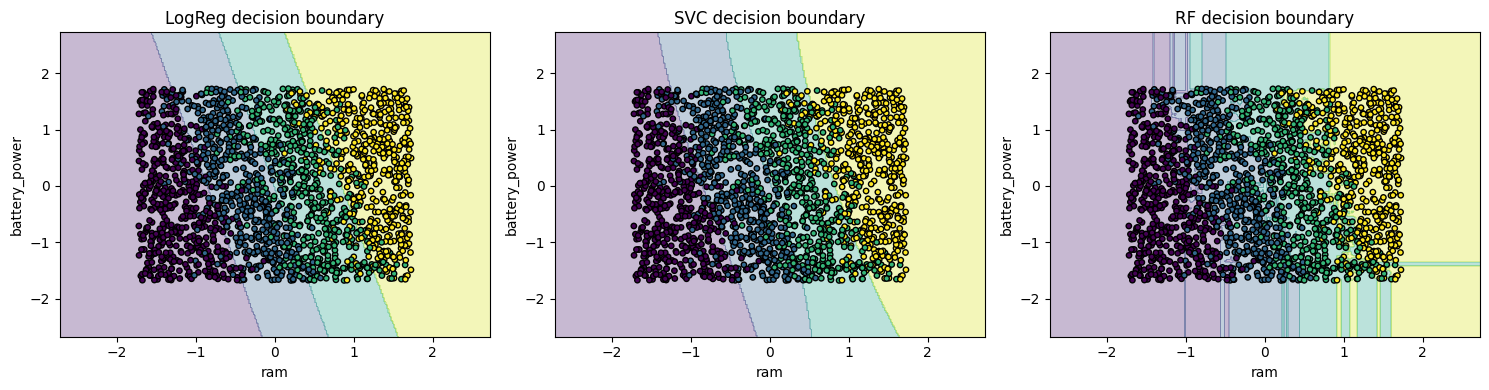

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 두 피처만 사용
X2 = df[['ram','battery_power']].values
y2 = df['price_range']

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# 여러 모델 정의

models2d = {
    "LogReg": LogisticRegression(max_iter=1000),
    "SVC": SVC(kernel="rbf", gamma=0.1, C=1, probability=True),
    "RF": RandomForestClassifier(n_estimators=200, random_state=42)
}

xx, yy = np.meshgrid(
    np.linspace(X2_scaled[:,0].min()-1, X2_scaled[:,0].max()+1, 300),
    np.linspace(X2_scaled[:,1].min()-1, X2_scaled[:,1].max()+1, 300)
)

plt.figure(figsize=(15,4))
for i,(name,clf) in enumerate(models2d.items(),1):
    clf.fit(X2_scaled, y2)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.subplot(1,3,i)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X2_scaled[:,0], X2_scaled[:,1], c=y2, edgecolor='k', cmap='viridis', s=15)
    plt.title(name + " decision boundary")
    plt.xlabel("ram"); plt.ylabel("battery_power")
plt.tight_layout(); plt.show()


다른 피쳐들이 삭제되었기 때문에 이 데이터만 가지고 속단할 수는 없으나, Random Forest의 경우에는 약간의 노이즈가 일부에서 과적합의 결과를 나타낸 것을 확인할 수 있네요!

또, SVC의 경우 조금 더 비선형적인 경계면을 반영한 감이 있습니다.



### 훈련 샘플 크기에 따른 학습 동역학 점검

데이터 양을 달리해가며 모델이 어떻게 학습되는지 관찰하는 과정을 동역학 점검이라고 말해요.
GridSearchCV 에서는 여러 파라미터를 가지고 모델 성능 분석을 진행했습니다.

만약 표본의 크기가 달라진다면 학습 성능에는 어떤 변화가 있을까요?

`learning_curve`를 활용하면 다음과 같이 편리하게 시각화를 진행할 수 있습니다.

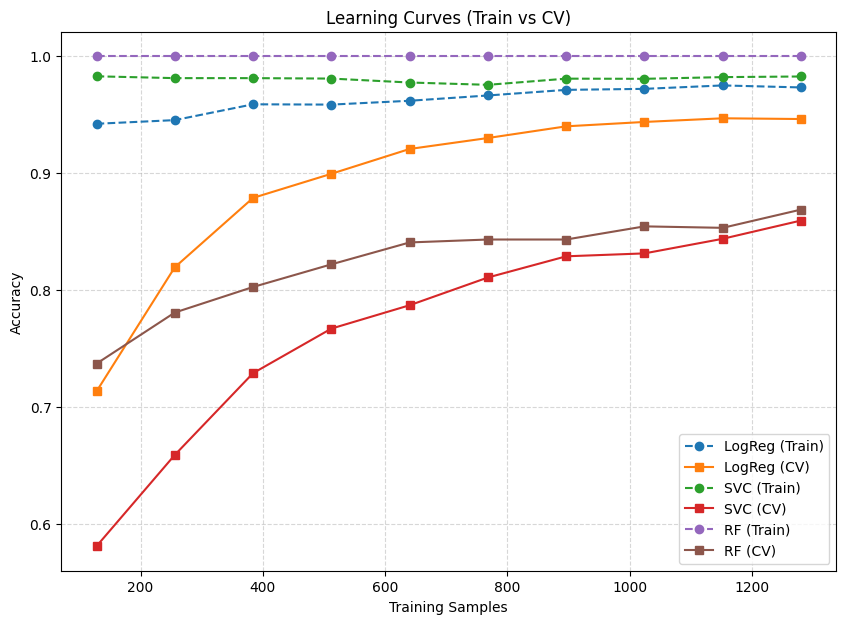

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "LogReg": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "RF": RandomForestClassifier(n_estimators=200, random_state=42)
}

plt.figure(figsize=(10,7))
for name, model in models.items():
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)

    # Train curve
    plt.plot(train_sizes, train_mean, '--', marker='o', label=f"{name} (Train)")
    # Validation curve
    plt.plot(train_sizes, val_mean, '-',  marker='s', label=f"{name} (CV)")

plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.title("Learning Curves (Train vs CV)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


학습 곡선을 보아하니, 조금 더 명백해지네요!

일반화 성능이 가장 좋았던 로지스틱 회귀에 비해, 더욱 모델 복잡도가 높은 SVM와 RF 두 모델 모두 훈련 데이터를 초기에 더 빨리 학습해버렸습니다.

아주 전형적인 과적합 (overfitting) 상태였네요!



In [ ]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    cv_acc = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    print(f"{name:6s} | Train Acc: {train_acc:.3f} | CV Acc: {cv_acc:.3f} | Gap: {train_acc - cv_acc:.3f}")


LogReg | Train Acc: 0.977 | CV Acc: 0.946 | Gap: 0.031
SVC    | Train Acc: 0.983 | CV Acc: 0.859 | Gap: 0.123
RF     | Train Acc: 1.000 | CV Acc: 0.869 | Gap: 0.131


# 결론!

분류 문제는 회귀와 다르게 또 새로운 특성이 많이 존재한다는 것을 확인했습니다.

1. EDA & Feature 분석
  - 데이터셋에서 RAM과 배터리 용량(battery_power)이 가격대(price_range)를 설명하는 핵심 피처임을 확인.
2. 모델 성능 비교
  - Logistic Regression, SVC, Random Forest를 비롯한 여러 모델을 학습하고 비교한 결과, Logistic Regression이 가장 높은 CV 성능과 안정성을 확보.
  - SVC와 RF는 훈련 데이터에서는 높은 정확도를 보였으나, 교차검증에서 성능이 크게 하락 → 과적합 경향이 확인됨.
  - Logistic Regression은 train–CV gap이 작고, 일반화 성능이 우수.
  - SVC와 RF는 훈련 성능 대비 CV 성능이 낮게 유지 → variance가 커서 데이터에 민감.

그 결과! **따라서 복잡한 모델보다 단순 선형모델이 이 데이터 구조에 더 적합하다는 것이 검증됨.**

고생하셨습니다!

오늘 학습했던 아이디어들을 기반으로 다른 주제에 대해서도 시도해보세요!